In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
temp = np.linspace(24.0, 48.0, 9)
temp_1 = np.append(temp, 50.0)
temp_2 = np.append(np.linspace(25.0, 43.0, 7), 46.9)
temp_dev_1 = 1/(temp_1 + 273)
temp_dev_2 = 1/(temp_2 + 273)
temp_1, temp_2, temp_dev_1, temp_dev_2

(array([24., 27., 30., 33., 36., 39., 42., 45., 48., 50.]),
 array([25. , 28. , 31. , 34. , 37. , 40. , 43. , 46.9]),
 array([0.003367  , 0.00333333, 0.00330033, 0.00326797, 0.00323625,
        0.00320513, 0.0031746 , 0.00314465, 0.00311526, 0.00309598]),
 array([0.0033557 , 0.00332226, 0.00328947, 0.00325733, 0.00322581,
        0.00319489, 0.00316456, 0.00312598]))

In [ ]:
press_1 = np.array([3087, 3631, 4284, 4964, 5889, 6841, 7956, 9370, 10758, 12090])
press_2 = np.array([3305, 3930, 4665, 5481, 6378, 7466, 8690, 10078])

ln_press_1 = np.log(press_1)
ln_press_2 = np.log(press_2)
ln_press_2

array([8.10319175, 8.2763947 , 8.44784311, 8.60904285, 8.76060985,
       8.91811466, 9.06992822, 9.21811011])

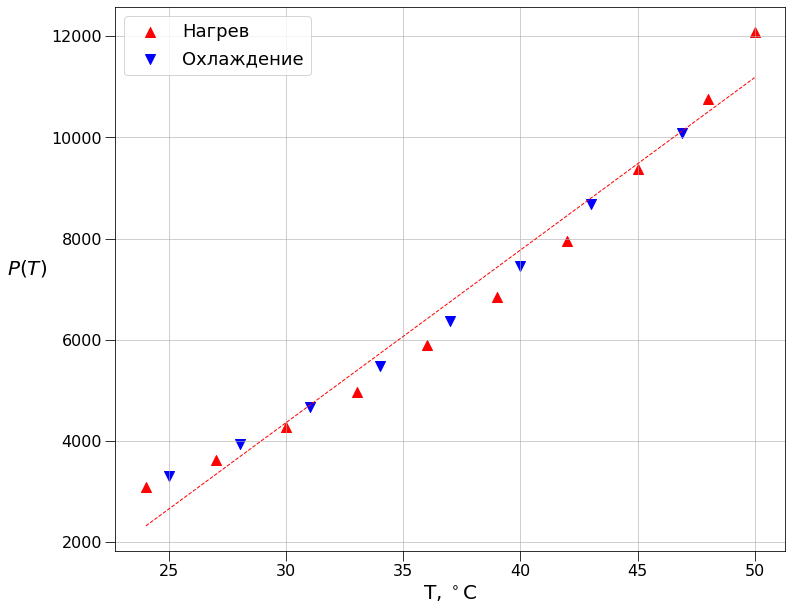

In [ ]:
plot_4 = plt.figure(figsize=(12,10))
plt.grid(visible=True, linewidth=0.6)

z = np.polyfit(temp_1, press_1, 1)
p = np.poly1d(z)
plt.plot(temp_1, p(temp_1),"r--", linewidth=1)


plt.scatter(temp_1, press_1, marker="^", s=100, c='red', label = 'Нагрев')
plt.scatter(temp_2, press_2, marker="v", s=100, c='blue', label = 'Охлаждение')
#plt.title('Зависимость $q = q(T)$', fontsize=18)
#plt.ylim(ymin=100, ymax=120)
plt.ylabel('$P(T)$', fontsize=20, rotation=0, ha='right')
plt.xlabel('T, $^\circ$C', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16, size=10)
plt.grid(visible=True, linewidth=0.6)

plt.legend(fontsize=18)
plt.show()


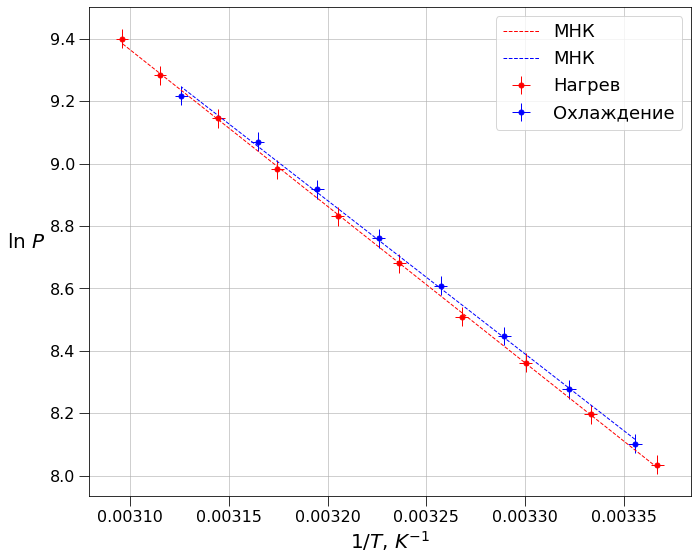

In [141]:
plot_5 = plt.figure(figsize=(12*0.9,10*0.9))
plt.grid(visible=True, linewidth=0.6)
yerr_1 = np.ones(10) * 0.03 
yerr_2 = np.ones(8) * 0.03
xerr_1 = temp_dev_1 * 0.001
xerr_2 = temp_dev_2 * 0.001

z = np.polyfit(temp_dev_1, ln_press_1, deg=1)
polynom = np.poly1d(z)
plt.plot(temp_dev_1, polynom(temp_dev_1),"r--", linewidth=1, label="МНК")

z, err = np.polyfit(temp_dev_2, ln_press_2, deg=1, cov=True)
polynom = np.poly1d(z)
plt.plot(temp_dev_2, polynom(temp_dev_2),"b--", linewidth=1, label="МНК")

plt.errorbar(temp_dev_1, ln_press_1, fmt='r.', linewidth=0, xerr=xerr_1, yerr=yerr_1, markersize=10, elinewidth=1, label='Нагрев') #, marker="^", s=100, c='red', label = 'Нагрев'
plt.errorbar(temp_dev_2, ln_press_2, fmt='b.', linewidth=0, xerr=xerr_2, yerr=yerr_2, markersize=10, elinewidth=1, label='Охлаждение') #, marker="v", s=100, c='blue', label = 'Охлаждение'
#plt.title('Зависимость $q = q(T)$', fontsize=18)
#plt.ylim(ymin=100, ymax=120)
plt.ylabel('ln $P$', fontsize=20, rotation=0, ha='right')
plt.xlabel('$1/T$, $K^{-1}$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16, size=10)
plt.grid(visible=True, linewidth=0.6)

plt.legend(fontsize=18)
plt.show()
plot_5.savefig('lnPT.pdf', format='pdf')

In [144]:
z = np.polyfit(temp_dev_2, ln_press_2, deg=1)
zz = np.polyfit(temp_dev_1, ln_press_1, deg=1)
z, zz

(array([-4914.2433986 ,    24.60737841]),
 array([-5014.40850483,    24.90939453]))

In [153]:
#Least Squared Error
x = temp_dev_1
y = ln_press_1
n = len(temp_dev_1)
k = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x * x) - np.mean(x) ** 2)
error = 1 / np.sqrt(n) * np.sqrt(((np.mean(y * y)) - np.mean(y) ** 2) / (np.mean(x * x) - np.mean(x) ** 2) - 0.17**2)
k*8.31, error

(-41669.7346751457, 1585.9605613244007)

In [154]:
#Least Squared Error
x = temp_dev_2
y = ln_press_2
n = len(temp_dev_2)
k = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x * x) - np.mean(x) ** 2)
error = 1 / np.sqrt(n) * np.sqrt(((np.mean(y * y)) - np.mean(y) ** 2) / (np.mean(x * x) - np.mean(x) ** 2) - 0.17**2)
k*8.31, error

(-40837.362642353975, 1738.6138114837656)